In [2]:
print('Hello world')

Hello world


In [3]:
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
WIDTH = 360
HEIGHT = 480
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [6]:
file_path = '/content/drive/My Drive/data'

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    file_path,
    shuffle=True,
    image_size=(WIDTH, HEIGHT),
    batch_size=BATCH_SIZE
)

Found 2906 files belonging to 4 classes.


In [7]:
class_names = dataset.class_names
class_names

['Boys-Apparel', 'Boys-Footwear', 'Girls-Apparel', 'Girls-Footwear']

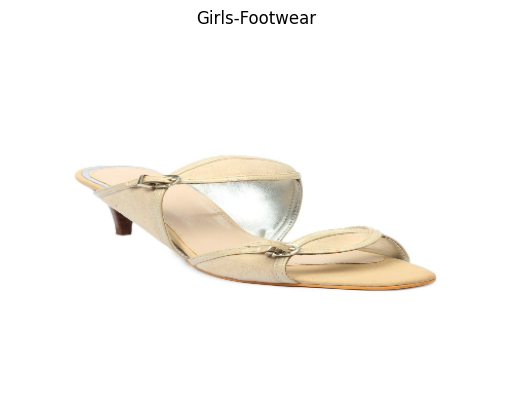

In [8]:
for image_batch, label_batch in dataset.take(1):
    first_image = image_batch[1].numpy().astype("uint8")

    plt.imshow(first_image)
    plt.title(class_names[label_batch[1]])
    plt.axis("off")
    plt.show()


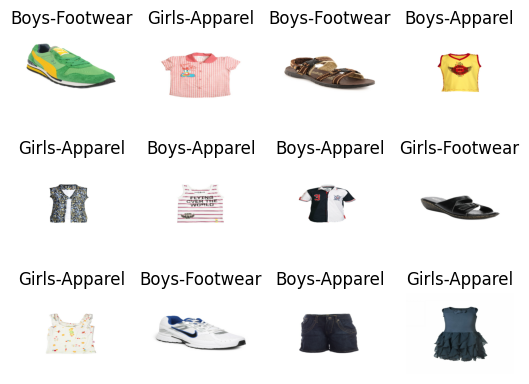

In [9]:
# plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i + 1)
        first_image = image_batch[i].numpy().astype("uint8")

        plt.imshow(first_image)
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    plt.show()

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [11]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(height=HEIGHT, width=WIDTH),
    layers.Rescaling(1./255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [15]:
input_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 480, 360, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 478, 358, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 239, 179, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 237, 177, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 118, 88, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 116, 86, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 58, 43, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 56, 41, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 28, 20, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 26, 18, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 13, 9, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 11, 7, 64)             │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 5, 3, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 960)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          61,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,868 (894.02 KB)

 Trainable params: 228,868 (894.02 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 639s 600ms/step - accuracy: 0.4464 - loss: 1.1739 - val_accuracy: 0.7807 - val_loss: 0.5023
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 57s 165ms/step - accuracy: 0.7541 - loss: 0.5127 - val_accuracy: 0.8272 - val_loss: 0.4011
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.8142 - loss: 0.4280 - val_accuracy: 0.8721 - val_loss: 0.3398
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.8484 - loss: 0.3460 - val_accuracy: 0.8864 - val_loss: 0.3173
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.8711 - loss: 0.3210 - val_accuracy: 0.9130 - val_loss: 0.2368
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.8890 - loss: 0.2835 - val_accuracy: 0.8986 - val_loss: 0.2382
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 0.9120 - loss: 0.2474 - val_accuracy: 0.9160 - val_loss: 0.2192
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.9151 - loss: 0.2185 - val_acc

In [19]:
history.history

{'accuracy': [0.5805047750473022,
  0.7780678868293762,
  0.8324630260467529,
  0.8529155850410461,
  0.8724977970123291,
  0.8986074924468994,
  0.9007833003997803,
  0.9186248779296875,
  0.9325500726699829,
  0.9364665150642395,
  0.9521322846412659,
  0.947345495223999,
  0.9612706899642944,
  0.9569190740585327,
  0.9743254780769348,
  0.9595300555229187,
  0.9782419204711914,
  0.9817232489585876,
  0.9878154993057251,
  0.9978241920471191],
 'loss': [0.9044323563575745,
  0.4880789816379547,
  0.3995262086391449,
  0.35982459783554077,
  0.32334965467453003,
  0.2644006907939911,
  0.26252803206443787,
  0.20610301196575165,
  0.18225108087062836,
  0.18390387296676636,
  0.13351787626743317,
  0.1484971046447754,
  0.10644350945949554,
  0.10559473186731339,
  0.06533563882112503,
  0.11864212900400162,
  0.06850627064704895,
  0.06435350328683853,
  0.03657552972435951,
  0.009634138084948063],
 'val_accuracy': [0.7806788682937622,
  0.827241063117981,
  0.8720626831054688,
  

In [20]:
scores = model.evaluate(test_ds)
scores

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 1.0000 - loss: 0.0020


[0.0022237517405301332, 1.0]

In [21]:
scores

[0.0022237517405301332, 1.0]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 72}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
history.history['accuracy']

[0.5805047750473022,
 0.7780678868293762,
 0.8324630260467529,
 0.8529155850410461,
 0.8724977970123291,
 0.8986074924468994,
 0.9007833003997803,
 0.9186248779296875,
 0.9325500726699829,
 0.9364665150642395,
 0.9521322846412659,
 0.947345495223999,
 0.9612706899642944,
 0.9569190740585327,
 0.9743254780769348,
 0.9595300555229187,
 0.9782419204711914,
 0.9817232489585876,
 0.9878154993057251,
 0.9978241920471191]

In [26]:
type(history.history['loss'])

list

In [27]:
len(history.history['loss'])

20

In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9044323563575745,
 0.4880789816379547,
 0.3995262086391449,
 0.35982459783554077,
 0.32334965467453003]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

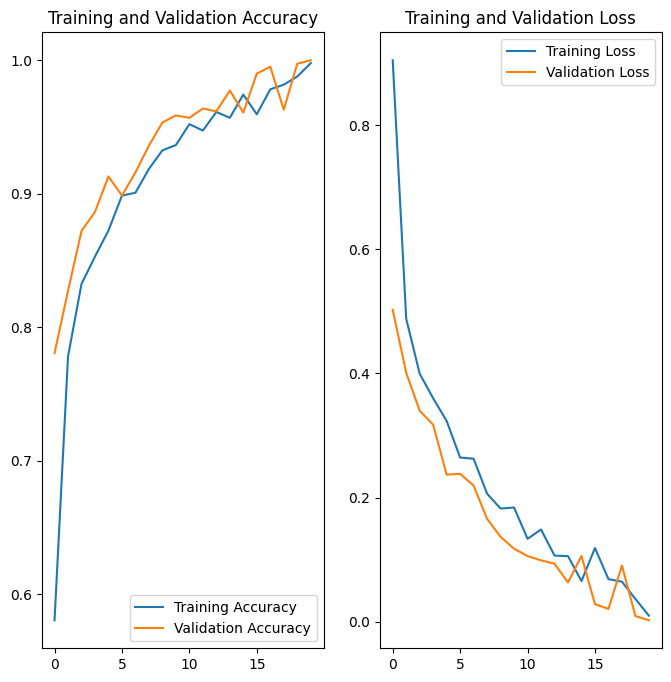

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Girls-Apparel
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
predicted label: Girls-Apparel


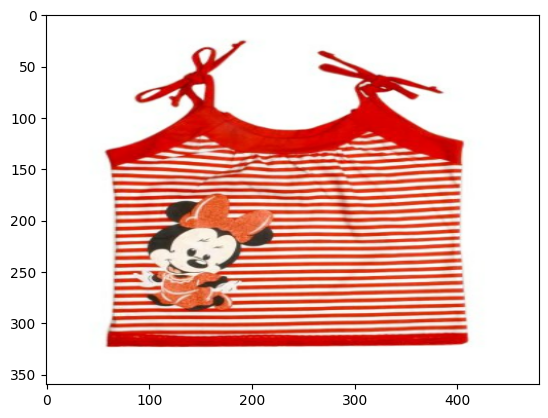

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


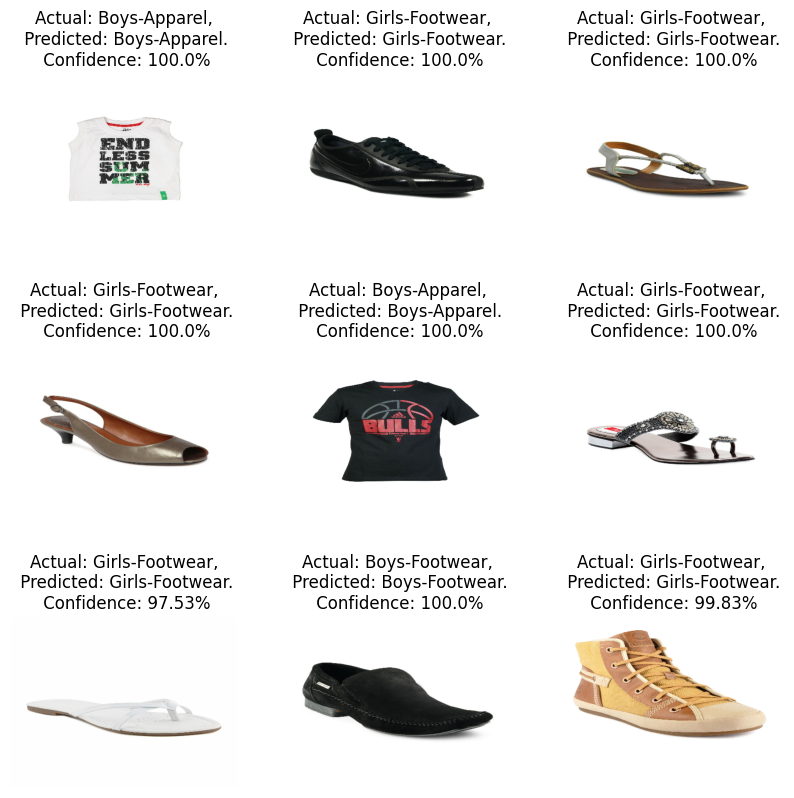

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [35]:
import os

# Define the directory to save the model
save_dir = "/content/drive/My Drive/models"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Calculate the new model version
model_version = max([int(i) for i in os.listdir(save_dir) + ["0"]]) + 1

# Save the model with the .h5 extension
model.save(f"{save_dir}/{model_version}.keras")

print(f"Model saved at {save_dir}/{model_version}.keras")


Model saved at /content/drive/My Drive/models/1.keras
